# Proyecto 2 - HDT 9

Diego García 22404 <br>
César López 22535 <br>

GitHub: https://github.com/DiegoGarV/HDT9-DM 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier

In [11]:
train = pd.read_csv("train.csv")

In [15]:
mean_price = train['SalePrice'].mean()
std_price = train['SalePrice'].std()

low_price = mean_price - std_price
mid_price = mean_price + std_price

def categorizar_casas(precio):
    if precio <= low_price:
        return "Barata"
    elif precio <= mid_price:
        return "Normal"
    else:
        return "Cara"

train['Categoria'] = train['SalePrice'].apply(categorizar_casas)
train['Categoria'].value_counts()

Categoria
Normal    1145
Cara       191
Barata     124
Name: count, dtype: int64

In [17]:
columnas_interes = ['OverallQual', 'GrLivArea', 'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea']

X = train[columnas_interes]
y = train["Categoria"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 7)
(292, 7)
(1168,)
(292,)


In [18]:
# Preprocesamiento

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[("num", numerical_transformer, columnas_interes)]
)

=== Modelo 1: ReLU ===
              precision    recall  f1-score   support

      Barata       0.62      0.52      0.57        25
        Cara       0.78      0.76      0.77        38
      Normal       0.91      0.93      0.92       229

    accuracy                           0.87       292
   macro avg       0.77      0.74      0.75       292
weighted avg       0.87      0.87      0.87       292



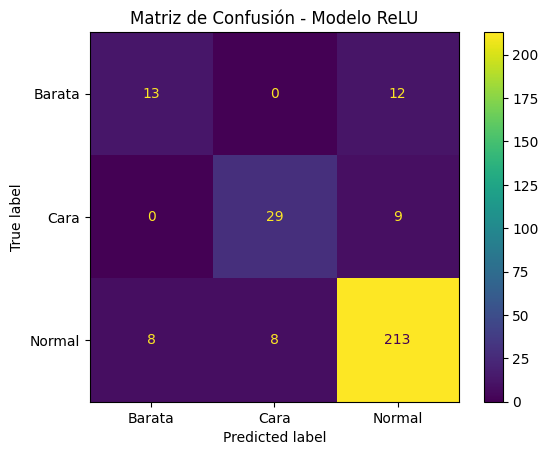

In [19]:
# Red neuronal 1: ReLU y topología (50, 20)

model_relu = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(hidden_layer_sizes=(50, 20), activation='relu', max_iter=1000, random_state=42))
])

model_relu.fit(X_train, y_train)
y_pred_relu = model_relu.predict(X_test)

print("=== Modelo 1: ReLU ===")
print(classification_report(y_test, y_pred_relu))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_relu)
plt.title("Matriz de Confusión - Modelo ReLU")
plt.show()


=== Modelo 2: tanh ===
              precision    recall  f1-score   support

      Barata       0.56      0.60      0.58        25
        Cara       0.77      0.63      0.70        38
      Normal       0.90      0.92      0.91       229

    accuracy                           0.85       292
   macro avg       0.74      0.72      0.73       292
weighted avg       0.85      0.85      0.85       292



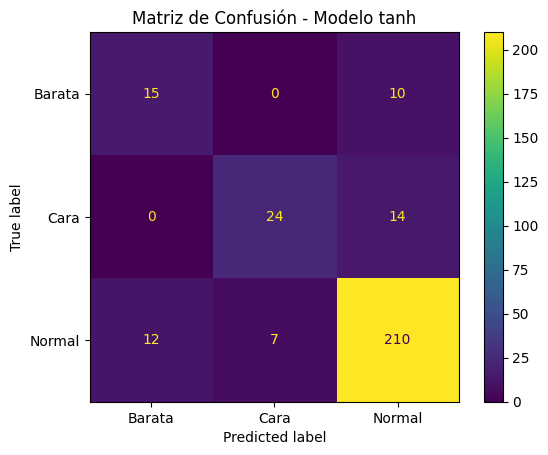

In [20]:
# Red neuronal 2: tanh y topología (100, 50, 25)
model_tanh = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='tanh', max_iter=1000, random_state=42))
])

model_tanh.fit(X_train, y_train)
y_pred_tanh = model_tanh.predict(X_test)

print("=== Modelo 2: tanh ===")
print(classification_report(y_test, y_pred_tanh))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tanh)
plt.title("Matriz de Confusión - Modelo tanh")
plt.show()


In [21]:
acc_relu = accuracy_score(y_test, y_pred_relu)
acc_tanh = accuracy_score(y_test, y_pred_tanh)

print(f"Accuracy Modelo ReLU: {acc_relu:.3f}")
print(f"Accuracy Modelo tanh: {acc_tanh:.3f}")


Accuracy Modelo ReLU: 0.873
Accuracy Modelo tanh: 0.853


In [25]:
# Balanceo

baratas = train[train["Categoria"] == "Barata"]
caras = train[train["Categoria"] == "Cara"]
normales = train[train["Categoria"] == "Normal"]

normales_downsampled = resample(normales, replace=False, n_samples=len(baratas), random_state=42)

caras_downsampled = resample(caras, replace=False, n_samples=len(baratas), random_state=42)

df_balanceado = pd.concat([baratas, caras_downsampled, normales_downsampled])

df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

X_clf_bal = df_balanceado[columnas_interes]
y_clf_bal = df_balanceado["Categoria"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_bal, y_clf_bal, test_size=0.2, random_state=42)

df_balanceado['Categoria'].value_counts()

Categoria
Normal    124
Barata    124
Cara      124
Name: count, dtype: int64

Evaluación del Modelo 1 (Balanceado):
              precision    recall  f1-score   support

      Barata       0.78      0.78      0.78        27
        Cara       0.94      0.94      0.94        18
      Normal       0.77      0.77      0.77        30

    accuracy                           0.81        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.81      0.81      0.81        75



C:\Users\dgv31\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


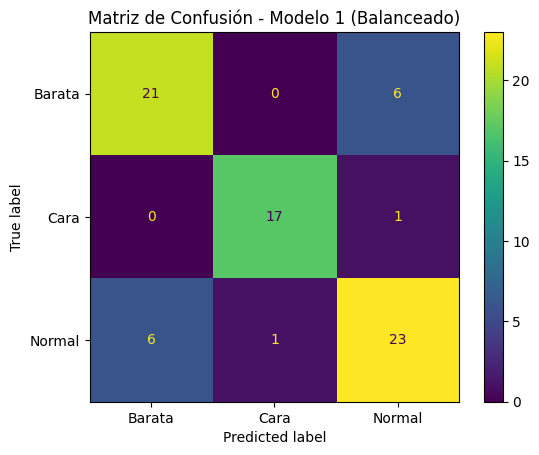

In [28]:
# Red neuronal 1 después del balanceo

modelo_1_bal = Pipeline([
    ('preprocesamiento', preprocessor),  # Usa el mismo preprocessor que antes
    ('clasificador', MLPClassifier(hidden_layer_sizes=(50, 25),
                                   activation='relu',
                                   max_iter=500,
                                   random_state=42))
])

modelo_1_bal.fit(X_train_clf, y_train_clf)
y_pred_1_bal = modelo_1_bal.predict(X_test_clf)

print("Evaluación del Modelo 1 (Balanceado):")
print(classification_report(y_test_clf, y_pred_1_bal))
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_1_bal)
plt.title("Matriz de Confusión - Modelo 1 (Balanceado)")
plt.show()


Evaluación del Modelo 2 (Balanceado):
              precision    recall  f1-score   support

      Barata       0.77      0.74      0.75        27
        Cara       0.95      1.00      0.97        18
      Normal       0.77      0.77      0.77        30

    accuracy                           0.81        75
   macro avg       0.83      0.84      0.83        75
weighted avg       0.81      0.81      0.81        75



C:\Users\dgv31\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


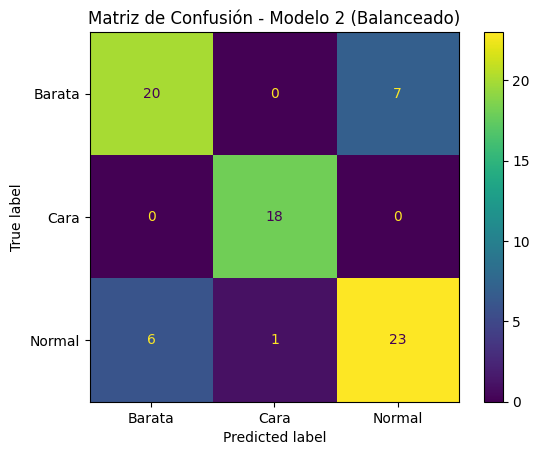

In [29]:
# Red neuronal 2 después del balanceo

modelo_2_bal = Pipeline([
    ('preprocesamiento', preprocessor),
    ('clasificador', MLPClassifier(hidden_layer_sizes=(100, 50, 25),
                                   activation='tanh',
                                   max_iter=500,
                                   random_state=42))
])

modelo_2_bal.fit(X_train_clf, y_train_clf)
y_pred_2_bal = modelo_2_bal.predict(X_test_clf)

print("Evaluación del Modelo 2 (Balanceado):")
print(classification_report(y_test_clf, y_pred_2_bal))
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_2_bal)
plt.title("Matriz de Confusión - Modelo 2 (Balanceado)")
plt.show()


In [30]:
# Accuracy de los modelos balanceados
acc_1_bal = accuracy_score(y_test_clf, y_pred_1_bal)
acc_2_bal = accuracy_score(y_test_clf, y_pred_2_bal)

print(f"Accuracy Modelo ReLU (balanceado): {acc_1_bal:.3f}")
print(f"Accuracy Modelo tanh (balanceado): {acc_2_bal:.3f}")

Accuracy Modelo ReLU (balanceado): 0.813
Accuracy Modelo tanh (balanceado): 0.813
